In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.array([1,2,3]) # 1차원 배열
b = np.array([2,2,2]) # 1차원 배열
print(a.shape, b.shape) 
c = np.dot(a,b)
print(c)

(3,) (3,)
12


In [4]:
a = np.array([[1,2,3],[1,2,3]]) # 2차원 배열
b = np.array([2,2,2])           # 1차원 배열
print(a.shape, b.shape) # (2,3) (3,)
c = np.dot(a,b) 
print(c)

(2, 3) (3,)
[12 12]


In [5]:
a = np.array([2,2])             # 1차원 배열
b = np.array([[1,2,3],[1,2,3]]) # 2차원 배열
print(a.shape, b.shape) # (2,) (2,3)
c = np.dot(a,b)
print(c)

(2,) (2, 3)
[ 4  8 12]


In [6]:
a = np.array([[2,2],[2,2]])     # 2차원 배열
b = np.array([[1,2,3],[1,2,3]]) # 2차원 배열
print(a.shape, b.shape) # (2,2) (2,3)
c = np.dot(a,b)
print(c)

(2, 2) (2, 3)
[[ 4  8 12]
 [ 4  8 12]]


In [7]:
a = np.array([[1,2],[1,2]])     # 2차원 배열
b = np.array([[2,2],[2,2]])     # 2차원 배열
print(a.shape, b.shape) # (2,2) (2,2)
c = np.dot(a,b)
print(c)

(2, 2) (2, 2)
[[6 6]
 [6 6]]


In [8]:
a = np.array([[1,2],[1,2]])     # 2차원 배열
b = np.array([[2,2],[2,2]])     # 2차원 배열
print(a.shape, b.shape) # (2,2) (2,2)
c = np.dot(b,a)
print(c)

(2, 2) (2, 2)
[[4 8]
 [4 8]]


### 행렬의 전치

In [9]:
a = np.array([1,2,3,4])
print(a.shape)
print(a)
print(a.T.shape)
print(a.T)
# print(a.reshape(3,1))
print(a.reshape(-1,1))

(4,)
[1 2 3 4]
(4,)
[1 2 3 4]
[[1]
 [2]
 [3]
 [4]]


In [10]:
a = np.array([[1,2],
              [3,4]])
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[[1 2]
 [3 4]]
(2, 2)
[[1 3]
 [2 4]]
(2, 2)


In [11]:
a = np.array([[1,2],
              [3,4],
              [5,6]])
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
[[1 3 5]
 [2 4 6]]
(2, 3)


In [12]:
X = np.array([[1,2],
              [3,4],
              [5,6]])  # (3,2)
W = np.array([[1],
              [2]])    # (2,1)

Y = np.array([2,2,2])
Y = Y.reshape(-1,1)
print(Y)

Y_hat = np.dot(X,W)  # (3,2)(2,1) => (3,1)
print(Y_hat)

Err = Y_hat - Y

dw = np.dot(X.T, Err)   # (2,3)(3,1) => (2,1)
print(W.shape)
print(dw.shape)

[[2]
 [2]
 [2]]
[[ 5]
 [11]
 [17]]
(2, 1)
(2, 1)


In [13]:
X = np.array([[1,2],
              [3,4],
              [5,6]])  # (3,2)
W = np.array([[1],
              [2]])    # (2,1)
Y = np.dot(X,W)  # (3,2)(2,1) => (3,1)
print(Y)
Err = np.array([[3],
                [2],
                [1]])  # (3,1)
dx = np.dot(Err, W.T)   # (3,1)(1,2)=> (3,2)
dx.shape

[[ 5]
 [11]
 [17]]


(3, 2)

### 브로드 캐스팅 연산

In [14]:
a = np.array([1,2,3])
b = np.array([2,2,2])
c = a+b
print(c)

[3 4 5]


In [15]:
a = np.array([1,2,3])
b = 3
c = a+b  # [1,2,3] + 3 => [1,2,3] + [3,3,3]  Repeat 연산
print(c)

[4 5 6]


In [16]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a.shape)
print(np.sum(a).shape)
print(np.sum(a, axis=0).shape)
print(np.sum(a, axis=1).shape)

(2, 3)
()
(3,)
(2,)


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [18]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [19]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


In [20]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):  # (364,30)(30,1) + (364,1)
#         print(x.shape)
#         print(w.shape)
        
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.
#         print(z.shape)
        return z

    def backprop(self, x, err):
        m = len(x)   # (30,364)(364,1) = (30,1)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
#         print(w_grad.shape)
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
#         print(b_grad.shape)
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        print('y.shape=', y.shape)
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        print('w.shape=', w.shape)
       
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            z = self.forpass(x)               # 정방향 계산을 수행합니다.  x.shape = (364,30)
#             print(z.shape)
#             print(z[:10,:])
            a = self.activation(z)            # 활성화 함수를 적용합니다.
#             print(a.shape)
#             print(a[:10,:])
            
            err = a - y                    # 오차를 계산합니다.
#             print(err.shape)
            
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            
            # 그래디언트에서 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)  # (364,30)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [23]:
single_layer = SingleLayer(l2=0.01)
# print(x_train_scaled.shape)
# print(y_train.shape)
single_layer.fit(x_train_scaled, y_train, 
                 x_val=x_val_scaled, y_val=y_val, epochs=10000)
# single_layer.score(x_val_scaled, y_val)

y.shape= (364, 1)


NameError: name 'w' is not defined

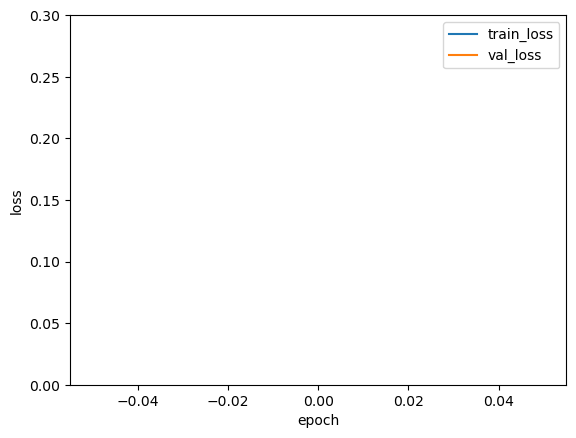

In [24]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

IndexError: list index out of range

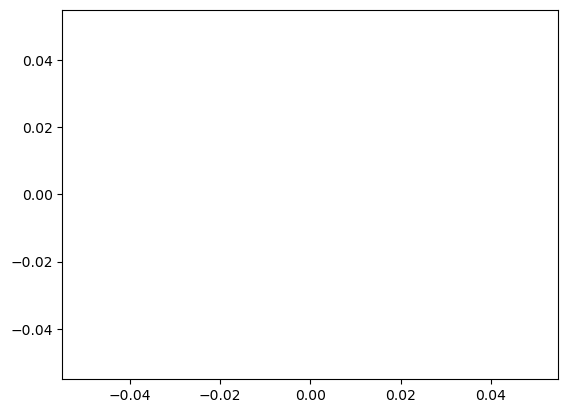

In [25]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

(5, 3)
(5,)


C:\Users\jikim\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[array([[-0.7155341 ,  0.13402738],
       [-0.47025916, -0.84886575],
       [ 1.2412896 ,  0.8416486 ]], dtype=float32), array([0.12294838, 0.09590077], dtype=float32)]
[array([[-0.6419545 ],
       [-0.55857295]], dtype=float32), array([0.13343629], dtype=float32)]
1/1 [==============================] - 0s 54ms/step


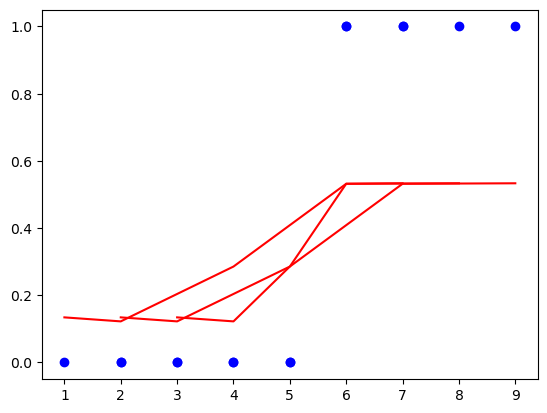

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np 
import matplotlib.pyplot as plt

X=np.array([[1,2,3],[2,3,4],[4,5,5],[6,7,6],[8,9,7]])  
print(X.shape)
Y=np.array([0,0,0,1,1]) 
print(Y.shape)

model=Sequential()
model.add(Dense(2, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='mse',metrics=['accuracy'])
model.fit(X,Y, batch_size=5, epochs=1000, shuffle=False,
         verbose=0)

w1 = model.layers[0].get_weights()
print(w1)
w2 = model.layers[1].get_weights()
print(w2)

plt.plot(X, Y, 'bo')
plt.plot(X, model.predict(X), 'r-')
plt.show()


In [27]:
import numpy as np 

a = np.array([[1,2],
              [3,4]])
b = np.array([[2,2],
              [1,1]])

print( np.dot(a,b))

[[ 4  4]
 [10 10]]


In [28]:
import numpy as np
temp = np.array([1,2,3,4,5])
temp = temp.reshape(-1, 1)
print(temp)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [29]:
import numpy as np
temp = np.array([[1,2,3,4,5]])
print(temp.T)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [30]:
import numpy as np
np.random.seed(42)
print(np.random.random(5))
print(np.random.random(5))

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
[0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]


In [31]:
import numpy as np
np.random.seed(100)
print(np.random.random(5))
print(np.random.random(5))

[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886]
[0.12156912 0.67074908 0.82585276 0.13670659 0.57509333]


In [32]:
import numpy as np
np.random.seed(100)
print(np.random.random((3,2)))


[[0.54340494 0.27836939]
 [0.42451759 0.84477613]
 [0.00471886 0.12156912]]


In [33]:
import numpy as np
np.random.seed(100)
print(np.random.normal(0,1,(3,2)))

[[-1.74976547  0.3426804 ]
 [ 1.1530358  -0.25243604]
 [ 0.98132079  0.51421884]]


In [34]:
import numpy as np
temp = np.random.normal(0,1,10000)
print( np.mean(temp) )
print( np.std(temp) )

0.0010890844226537808
1.0061349860605973


In [35]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = a - y            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [36]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, 
               x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

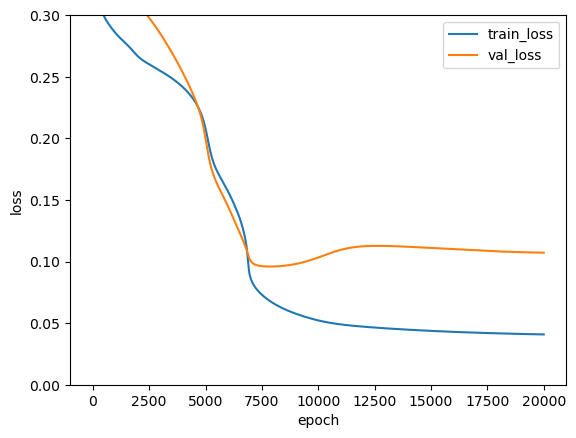

In [37]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [38]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

In [39]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val=x_val_scaled, y_val=y_val, epochs=500)

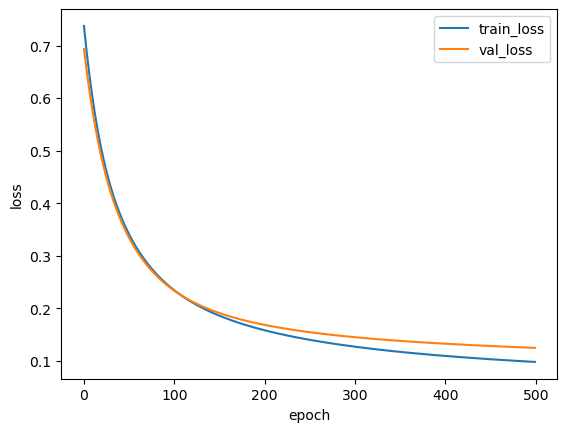

In [40]:
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### 제너레이터 함수

In [42]:
def foo():
    print("foo()")
    return 10
    print("after")
    
ret = foo()
print(ret)

foo()
10


In [43]:
def foo():
    print("foo()")
    yield 10
    print("after")
    
ret = foo()
print(ret)

<generator object foo at 0x000001CA384F5190>


In [47]:
def foo():
    print("foo()")
    yield 10
    print("after")
    yield 20
    
ret = foo()
print(ret)
print(next(ret))
print(next(ret))
print(next(ret))

<generator object foo at 0x000001CA384F54A0>
foo()
10
after
20


StopIteration: 

In [48]:
def foo():
    print("foo()")
    yield 10
    print("after")
    yield 20
    
for data in  foo():
    print(data)

foo()
10
after
20


In [49]:
batch_size = 3
def foo():
    a = [1,2,3,4,5,6,7,8,9,10]
    length = len(a)
    bins = length // batch_size
    if length % batch_size:
        bins += 1 
    for i in range(bins):
        start = batch_size * i
        end   = batch_size * (i + 1)
        yield a[start:end]
    
for data in  foo():
    print(data)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[10]


In [51]:
batch_size = 8

def foo():
    x = np.arange(100,207)
    length = len(x)
    bins = length // batch_size # 미니배치 횟수
    if length % batch_size:
        bins += 1 
    
    indexes = np.random.permutation(len(x)) # 인덱스를 섞습니다.
    x = x[indexes]
    for i in range(bins):
        start = batch_size * i
        end   = batch_size * (i + 1)
        yield x[start:end]
        
for i in foo():
    print(i)

[170 138 188 106 189 103 172 181]
[190 142 204 180 178 196 136 186]
[167 133 155 176 203 143 166 151]
[122 200 137 139 185 164 191 141]
[154 165 121 183 125 201 110 205]
[150 187 161 169 129 109 101 124]
[192 104 193 105 134 145 158 128]
[147 168 112 195 152 132 108 116]
[162 126 163 140 177 149 159 157]
[182 197 107 127 123 175 171 199]
[173 111 198 194 115 102 153 100]
[130 114 113 148 202 117 156 119]
[118 135 174 184 179 120 146 160]
[206 131 144]


In [53]:
class MinibatchNetwork(RandomInitNetwork):
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        super().__init__(units, learning_rate, l1, l2)
        self.batch_size = batch_size     # 배치 크기
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y_val = y_val.reshape(-1, 1)     # 타깃을 열 벡터로 바꿉니다.
        self.init_weights(x.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        np.random.seed(42)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                m = len(x_batch)                 # 샘플 개수를 저장합니다.
                a = self.training(x_batch, y_batch, m)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

In [54]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

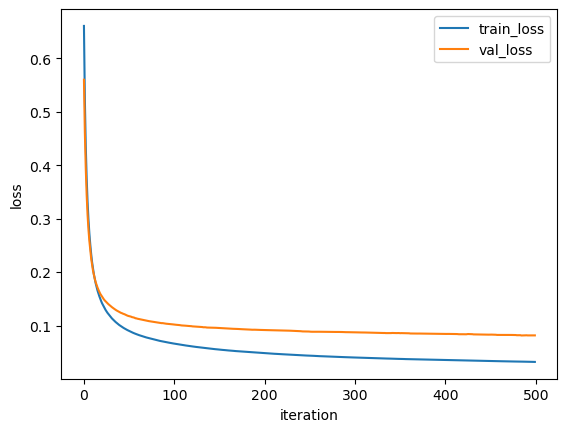

In [55]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [56]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=64)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

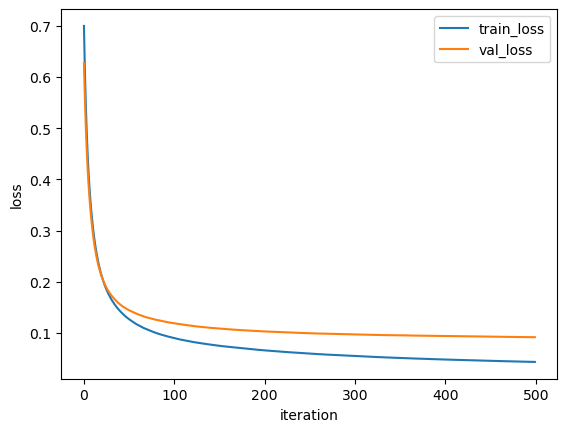

In [57]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()